# <center>VAI Academy</center>
# <center> Estatística - Parte 2</center>
___
Todo o conteúdo que você terá acesso ao longo desse período é confidencial, não sendo possível compartilhar ou comercializar os links ou os materiais recebidos que sejam de propriedade da VAI Academy.

Dessa forma, ao participar do curso você está aceitando os termos de confidencialidade e não-comercialização dos conteúdos que serão recebidos.
___
# <center> Objetivos de aprendizado </center>
- Compreender os conceitos básicos de estatística (e.g. média, mediana, variância, desvio padrão, correlação)
- Compreender os conceitos básicos de probabilidade e sua relação com a estatística
- Formar hipóteses, conhecer e analisar os tipos de erros
___

## Sumário
4. [Estatística descritiva](#descstats)


**Os conceitos que você vai aprender nessa aula terão grande utilidade em outras etapas da ciência de dados!**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carregando Variáveis

Para conseguirmos seguir aprendendo os conceitos a partir de onde paramos no notebook anterior, faremos a leitura de um arquivo pickle na célula a seguir. Não se preocupe em entender o significado da célula a seguir nesse momento, entraremos no detalhe do seu funcionamento mais a frente no curso. O arquivo ```var_AMEM00NB02_parte_2.pkl``` deve se encontrar junto com os arquivos de dados desse notebook. Basta colocá-lo na pasta dados e rodar a célula a seguir.

In [ ]:
import pickle

with open("/content/drive/MyDrive/Cursos/Ciência de Dados/02 - Alula /dados/var_AMEM00NB02_parte_2.pkl", "rb") as f:
    diamond_df = pickle.load(f)

## Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### 4.3. Medidas de posição

Geralmente queremos representar um conjunto de dados a partir de apenas alguns valores que sejam representativos do todo. Geralmente usamos as medidas de posição (ou localização) central, que são a média, moda e mediana.

#### 4.3.1. Média
A média aritmética simples, ou simplesmente média, é a medida de tendência central mais popular e usada no dia-a-dia. Ela é obtida dividindo-se a soma dos valores pela quantidade de elementos.

Em termos matemáticos, calculamos a média como:
\begin{equation*}
\bar{x} = \frac{1}{N}\sum\limits_{k=1}^{N}x_k
\end{equation*}
onde $\bar{x}$ representa a média, $N$ a quantidade de dados e $x_k$ o valor do k-ésimo dado.

Como já aprendemos a calcular a média tanto em matrizes numéricas como em um  Pandas df (dataframe), vamos relembrar com um exercício.


##### Exercício 4.6
Obtenha a média da medida de preço dos diamantes (variável `price`) usando o método  `mean()` das bibliotecas:
1. NumPy
2. Pandas

In [ ]:
# Escreva sua resposta aqui:
pd_mean = pd.DataFrame(diamond_df.price).mean()

print("Média com Pandas: ", float(pd_mean))

price = np.array(diamond_df.price) # Converte um pandas df em um numpy array
# Escreva sua resposta aqui:
np_mean = np.mean(price)
print("Média com NumPy: ", float(np_mean))


Média com Pandas:  3932.799721913237
Média com NumPy:  3932.799721913237


#### 4.3.2. Mediana
A mediana corresponde ao **valor central** de um conjunto de dados que foram previamente ordenados de forma crescente, separando a metade maior e a metade menor desses dados. Se o número de amostras for igual, tomamos a média dos dois valores centrais.

<img src="https://i.imgur.com/3fEikig.png" alt="as" width="350" />

A vantagem de usar a mediana em relação à média é que a mediana é menos susceptível a mudanças quando existem valores excepcionalmente altos ou baixos dentro de um conjunto de dados. Assim, em análises de dados onde existem muitos valores extremos, como por exemplo renda familiar ou outros ativos voláteis, a média pode ser distorcida por um pequeno número de valores extremamente altos ou baixos, enquanto a mediana pode dar uma ideia melhor de um valor típico do conjunto.

##### Exercício 4.7

Complete a função a seguir para calcular a mediana de uma coluna de um DataFrame. Caso tenha dúvidas, veja o exemplo da imagem acima.

In [ ]:
def get_median_from_df(df, column_name):
    """
    Calcula a mediana da coluna 'column_name' do dataframe df
    Input: dataframe e nome da coluna para a qual deseja-se calcular a mediana
    Output: mediana (type: float)
    """

    # Converta os dados para um numpy array
    var_array = np.array(df.price)

    # Obenha o número de elementos do array
    N = len(var_array)

    # Ordena o array com o método np.sort()
    ord_array = np.sort(var_array)

    # Verificando a pariddade do número de elementos
    if N % 2 == 1: # Se N for ímpar
        median = ord_array[N]
    else: # Se N for par, então pega a média dos dois valores centrais
        median = sum(ord_array[N//2-1:N//2+1])/2.0

    return float(median)


# Verifique seus resultados
price_50 = get_median_from_df(diamond_df,'price') # Use a função que criamos para calcular a mediana da coluna 'price'
print("Mediana calculada: ", price_50)
print("Mediana do Pandas: ", float(diamond_df.price.median()))
print("Mediana do Numpy: ", float(np.median(diamond_df.price)))

Mediana calculada:  2401.0
Mediana do Pandas:  2401.0
Mediana do Numpy:  2401.0


#### 4.3.3. Moda
A moda representa o **valor mais frequente** no conjunto de dados.

Diferente da média e da mediana, a moda é especialmente útil em variáveis categóricas, em que a média e a mediana não podem ser definidas. Por exemplo, a moda da amostra

`['maçã', 'banana', 'laranja', 'laranja', 'laranja', 'pêssego']` é laranja

##### Exercício 4.8
Retorne o valor mais comum da variável `color` **usando a tabela de frequências**. Depois, compare seus resultados com a função [`mode()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html) da biblioteca Pandas.

In [ ]:
# Crie a tabela de frequência
color_counts = pd.crosstab(index=diamond_df.color, columns="color")

print("color_counts: \n", color_counts) # Visualizando a tabela de frequências

# Ordene pela frequência ('count')
#color_counts_ord = color_counts.sort_values(by='count', ascending=True)


# Pegando os índices dos valores ordenados por sua frequência
#ordered_idx = color_counts_ord.index

# Pegue o primeiro ou último elementos da lista, dependendo da forma como você ordenou a lista
#mode = _______

#print("Moda pela tabela de frequências: ", mode)
#print("Moda pelo Pandas:                ", diamond_df.color.mode())

color_counts: 
 col_0  color
color       
D       6775
E       9797
F       9542
G      11292
H       8304
I       5422
J       2808


#### 4.3.4 Comparação entre as medidas
Normalmente usamos a média como a única medida de tendência central de um conjunto de dados ou variável. No entanto, quando os dados têm muitos *outliers* (falaremos mais sobre isso mais tarde), valores extremos ou não possuem uma distribuição normal, a média pode não ser a melhor escolha. Abaixo encontra-se um quadro resumindo as vantagens e desvantagens de utilizar cada uma das medidas de tendência central apresentadas.

| Medida | Vantagens | Desvantagens |
|-|-|-|
| Média | Leva em conta todos os valores dos dados | É influenciada por *outliers* |
| Mediana  | Menos sensível a *outliers* do que a média | Ordenamento é custoso em grandes quantidades de dados |
| Moda    | Adequada para o uso com variáveis categóricas | Não tem nenhuma propriedade matemática útil |

#### 4.3.5. Percentil/Quartil

Um percentil é uma medida utilizada na estatística descritiva que indica **o valor abaixo do qual uma determinada percentagem de observações se situa**. Por exemplo, o 20º percentil é o valor abaixo do qual 20% das amostras presentes no conjunto de dados podem ser encontradas.

O **25º percentil é também conhecido como o primeiro quartil ou quartil inferior** ($Q_1$), o **50º percentil como mediana ou segundo quartil** ($Q_2$), e o **75º percentil como terceiro quartil ou quartil superior** ($Q_3$).

##### Exercício 4.9
Obtenha os quartis da variável `price` usando:

1. A função `percentile()` da biblioteca numpy
2. A função `quantile()` da biblioteca pandas

In [ ]:
# Escreva sua resposta aqui:
inter_q_quant = diamond_df.price.quantile(1/4) # quantile: de 0 a 1
print("1º quartil - função quantile:   ", inter_q_quant)

inter_q_perc = np.percentile(diamond_df.price, 75) # percentile: de 0 a 100 (%)
print("3º quartil - função percentile: ",inter_q_perc)

# Não altere as linhas abaixo
# Convertendo formato das variáveis para compatibilidade com a submissão
q_quant_1 = float(inter_q_quant)
q_perc_3 = float(inter_q_perc)

1º quartil - função quantile:    950.0
3º quartil - função percentile:  5324.25


##### Exercício 4.10
E, por fim, resumindo a variável `price`

In [ ]:
# Mínimo
min_price = diamond_df.price.min()
# Primeiro quartil
quartil_price_1 = diamond_df.price.quantile(1)
# Média
mean_price = diamond_df.price.mean()
# Mediana
median_price = diamond_df.price.median()
# Terceiro quartil
quartil_price_3 =  np.percentile(diamond_df.price, 75)
# Máximo
max_price = diamond_df.price.max()

print("Variável PRICE",
      "\nMínimo: ", float(min_price),
      "\n1º Quartil: ", float(quartil_price_1),
      "\nMédia", float(mean_price),
      "\nMediana", float(median_price),
      "\n3º Quartil", float(quartil_price_3),
      "\nMáximo:", float(max_price))

Variável PRICE 
Mínimo:  326.0 
1º Quartil:  18823.0 
Média 3932.799721913237 
Mediana 2401.0 
3º Quartil 5324.25 
Máximo: 18823.0


### 4.4. Medidas de Dispersão
As medidas de dispersão são valores estatísticos que têm como objetivo **determinar o grau de variabilidade dos dados a partir de um conjunto de valores**.

Num conjunto de dados, se todas as amostras de uma variável estão próximas, isso indica uma dispersão baixa, e que os diferentes elementos não são muito diferentes com relação a essa variável. Por outro lado, se as observações estão dispersas, isso indica diferenças entre as observações.

A utilização das medidas de dispersão em conjunto com as de tendência central (média, mediana, moda) torna a análise de uma amostra mais precisa, e são as propriedados mais usadas. Enquanto as variáveis de tendência ou posição ajudam a encontrar a caracerística homogênea nos dados, as medidas de dispersão são um indicador de como os dados estão espalhados em torno do centro.

#### 4.4.1. Amplitude
Uma medida de dispersão bastante intuitiva é a **amplitude dos dados**, definida como a diferença entre os valores máximo e mínimo no *dataset*, ou seja:

\begin{equation*}
A = \max - \min
\end{equation*}

Como essa medida considera apenas dois valores, qualquer que seja o tamanho do conjunto de dados, ela tem propriedades limitadas para descrever a dispersão dos dados.

##### Exercício 4.11
Determine a amplitude da variável `price` usando as funções  `min()` e `max()` das bibliotecas:
1. NumPy
2. Pandas

In [ ]:
# Escreva sua resposta aqui:
price = np.array(diamond_df.price) # Converte um pandas df em um numpy array
range_np = np.max(price) - np.min(price)
range_pd = pd.DataFrame(price).max() - pd.DataFrame(price).min()
print("Amplitude pelo Numpy", range_np)
print("Amplitude pelo Pandas",range_pd)

# Não altere as linhas abaixo
# Convertendo formato das variáveis para compatibilidade com a submissão
range_np = float(range_np)
range_pd = float(range_pd)

Amplitude pelo Numpy 18497
Amplitude pelo Pandas 0    18497
dtype: int64


<a id='std_form'></a>
#### 4.4.2. Variância
A variância é determinada pela média dos quadrados dos desvios, onde o desvio é a diferença entre o valor observado e a média da amostra de dados. O cálculo é baseado na seguinte fórmula:

\begin{equation*}
s^2 = \frac{1}{N-1} \sum\limits_{k=1}^{N} (x_k - \bar{x})^2
\end{equation*}

Onde
* $s^2$: variância
* $x_k$: valor observado
* $N$: número de elementos no conjunto observado
* $\bar{x}$: média aritimética da amostra

Talvez você esteja se perguntando sobre o $- 1$ do denominador $N - 1$ pois você pode já ter visto essa fórmula sem essa parte, ou não esteja tão claro o que significa! É que, quando estamos fazendo análise em cima de toda a população o denominador fica $N$, mas, quando estamos falando apenas de uma amostra, o denominador ganha esse novo termo, que é chamado de **Correção de Bessel** e serve para reduzir o viés da amostra, aumentando a variância especialmente nos casos em que temos poucos dados!

#### 4.4.3. Desvio padrão
O desvio padrão (em inglês, *standard deviation*) é definido como a raiz quadrada da variância. Desta forma, a unidade de medida do desvio padrão será a mesma que a unidade de medida dos dados, o que não acontece com a variância.


Assim, o desvio padrão é encontrado pelo equacionamento:
\begin{equation*}
s =  \sqrt{s^2}
\end{equation*}

Quanto mais próximo de 0 é o desvio padrão, menor é a dispersão dos dados. Com isso, quando todos os valores de uma amostra são iguais, o desvio padrão é igual a 0.

##### Exercício 4.12
Preencha o código em branco da função `get_variance_from_df()` e verifique se a variância e o desvio padrão (*std*) correspondem aos retornados pelas funções da biblioteca Pandas.

In [ ]:
# Escreva sua resposta aqui:
def get_variance_from_df(df, column_name):
    """
    Obtem a variância do nome_da_coluna do dataframe df
    Input: dataframe e nome da coluna para a qual se deseja calcular a variância
    Output: variância (type: float)
    """

    # Converte os dados em um numpy array
    var_array = np.array(df[column_name])

    # Obtem o número de elementos do array
    N = var_array.shape[0] # ou len(var_array)

    # Obtem a média dos dados em column_name
    mean_array = var_array.mean()

    # Escreva sua resposta aqui:
    variance = ((var_array - mean_array)**2).mean() / N

    return float(variance)


def get_std_deviation_from_df(df, column_name):
    """
    Obtem o desvio padrão do nome_da_coluna do dataframe df
    Input: dataframe e nome da coluna para a qual se deseja calcular o desvio padrão
    Output: desvio padrão (type: float)
    """

    return float(math.sqrt(get_variance_from_df(df, column_name)))


variance = get_variance_from_df(diamond_df, 'price')
std_deviation = get_std_deviation_from_df(diamond_df, 'price')

print("Variância calculada: ", variance)
print("Desvio padrão calculado: ", std_deviation)

# Verifique seus resultados
print("Variância calculada:   ", variance)
print("Variância pelo Pandas: ", diamond_df.price.std()**2)
print("Desvio padrão calculado:   ", std_deviation)
print("Desvio padrão pelo Pandas: ",diamond_df.price.std())

Variância calculada:  295.05625440446534
Desvio padrão calculado:  17.17720158828164
Variância calculada:    295.05625440446534
Variância pelo Pandas:  15915629.42430145
Desvio padrão calculado:    17.17720158828164
Desvio padrão pelo Pandas:  3989.439738146379


#### 4.4.4. Distância Inter-Quartil

A amplitude interquartil, intervalo interquartil (IIQ) ou *interquartile range* (IQR) é a diferença entre o primeiro e o terceiro quartil. Desse modo, dentro desta distância interquartil encontra-se 50% dos nossos dados.

##### Exercício 4.13
Obtenha a amplitude interquartil da variável `price` usando:

1. A função `percentile()` da biblioteca numpy
2. A função `quantile()` da biblioteca pandas

In [ ]:
# Escreva sua resposta aqui:
inter_q_quant = diamond_df.price.quantile(3/4) -  diamond_df.price.quantile(1/4) # quantile: de 0 a 1
print("IIQ pela função quantile:   ", inter_q_quant)

inter_q_perc = np.percentile(price, 75) - np.percentile(price, 25) # percentile: de 0 a 100 (%)
print("IIQ pela função percentile: ",inter_q_perc)

# Não altere as linhas abaixo
# Convertendo formato das variáveis para compatibilidade com a submissão
inter_q_quant_4_13 = float(inter_q_quant)
inter_q_perc_4_13 = float(inter_q_perc)

IIQ pela função quantile:    4374.25
IIQ pela função percentile:  4374.25


##### Exercício 4.14 (não avaliado)

Na aula de Pandas, aprendemos uma função que resume todas as métricas que analisámos anteriormente. Esta função chama-se `describe()`. Experimente-a na célula abaixo.


In [ ]:
# Escreva sua resposta aqui:
diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### 4.4.5. Box Plot

O *box plot* (ou diagrama de caixa) é uma representação gráfica que permite a visualização de uma variável de forma simples, dando uma noção das medidas de tendência central e de dispersão em um só lugar. Ele pode ser utilizado para identificar outliers, avaliar se a distribuição dos dados é simétrica, se os dados estão agrupados, ou até se eles estão enviesados ou não.

Abaixo verá os principais valores necessários para construir um gráfico de caixa.

<img src="https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png" alt="drawing" width="300"/>

Para construir um box plot em Python, é só usar a função [`boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) da biblioteca `matplotlib`

Rode o código abaixo para ver o boxplot da variável `price`

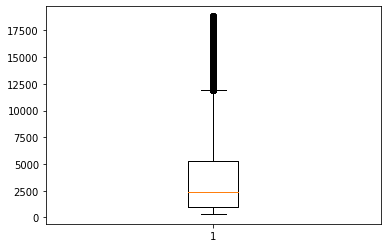

In [ ]:
_ = plt.boxplot(diamond_df['price'])

Podemos ver que temos muitos outliers, que são os preços que fogem da nossa expectativa! No Box-Plot os circulos pretos podem até aparecer uma barra de tão juntos que estão, mas são os diversos outliers!

Além disso, conseguimos identificar que a mediana está perto de 2500 graficamente (barra laranja) e que o 3º quartil (topo do quadrado) está em torno de 5000, em linha do que já vimos anteriormente!

Com esse box-plot podemos entender que 75% dos diamantes custam até 5000 dólares, aproximadamente, porém há, ainda assim, um grande número de diamantes com preços muito elevados, acima de 12500! Isso nos leva a crer que esses diamantes caríssimos não são uma questão de sorte inexplicada, mas que deve haver algum fator, ou conjunto de fatores, que eleva o preço de um diamante a patamares tão altos dada a frequência desse acontecimento.

<a id="submiss"></a>
## Submissão do Exercício

# Declaração de Inexistência de Plágio:

1. Eu sei que plágio é utilizar o trabalho de outra pessoa e apresentar como meu.
2. Eu sei que plágio é errado e declaro que este notebook foi feito por mim.
3. Tenho consciência de que a utilização do trabalho de terceiros é antiético e está sujeito à medidas administrativas.
4. Declaro também que não compartilhei e não compartilharei meu trabalho com o intuito de que seja copiado e submetido por outra pessoa.

In [ ]:
# LEMBRE-SE DE SALVAR O NOTEBOOK ANTES DE EXECUTAR ESSA CELULA
token = 'eda5e002-9643-4773-90e8-63ee46a8a754' # seu token aqui

# Não altere o código abaixo
import requests as req
%matplotlib
exec(req.get('https://api.vai.academy/submissioncode2').text)
%matplotlib inline

Using matplotlib backend: agg


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pydrive/files.py", line 134, in __getitem__
    return dict.__getitem__(self, key)
KeyError: 'title'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib

Importante: lembre-se de salvar o notebook antes de rodar esta célula!
Executando o seu notebook para a submissão. Isso pode demorar alguns instantes...
>> Verificando exercicios para correção... 
>> Submetendo exercício 4.6... "Score: 1/2"
>> Submetendo exercício 4.7... "Score: 2/2"
>> Submetendo exercício 4.8... 